# Interpolasi Newton

In [1]:
using Plots
using Polynomials

In [2]:
function divided_difference(x_data, y_data)
    n = length(x_data)
    
    # divided-difference
    div_diff = zeros(n, n)
    div_diff[:, 1] .= y_data
    
    for j in 2:n
        for i in j:n
            div_diff[i, j] = (div_diff[i, j-1] - div_diff[i-1, j-1]) / (x_data[i] - x_data[i-j+1])
        end
    end
    
    return div_diff
end

divided_difference (generic function with 1 method)

In [3]:
function poly_newton(x_data, d, x) 
    n = length(x_data)
    # polynomial Newton
    hasil = d[n, n]
    for i in (n-1):-1:1
        hasil = hasil * (x - x_data[i]) + d[i, i]
    end
    
    return hasil
end

poly_newton (generic function with 1 method)

In [4]:
x = [i for i in range(-1, 1, length=10)]
y = sin.(π*x);

In [5]:
d = divided_difference(x, y)

10×10 Matrix{Float64}:
 -1.22465e-16   0.0        0.0      …   0.0        0.0       0.0
 -0.642788     -2.89254    0.0          0.0        0.0       0.0
 -0.984808     -1.53909    3.04527      0.0        0.0       0.0
 -0.866025      0.534521   4.66563      0.0        0.0       0.0
 -0.34202       2.35802    4.10288      0.0        0.0       0.0
  0.34202       3.07818    1.62035  …   0.0        0.0       0.0
  0.866025      2.35802   -1.62035      0.0        0.0       0.0
  0.984808      0.534521  -4.10288     -0.398      0.0       0.0
  0.642788     -1.53909   -4.66563     -0.519552  -0.068373  0.0
  1.22465e-16  -2.89254   -3.04527     -0.398      0.068373  0.068373

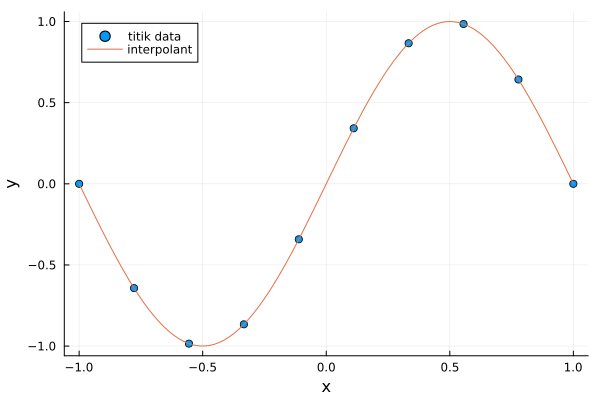

In [6]:
xx = range(-1, 1, length=100)
yy = [poly_newton(x, d, xx[i]) for i in 1:length(xx)]
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="interpolant")